In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.set_option('display.max_columns',None)
df=pd.read_csv(r'D:\Data Analytics\Python\Panda\Problem_Solving\ecommerce_clean.csv')

In [2]:
df.head(2)

,Unnamed: 0,index,order_id,order_date,delivered_date,customer_id,customer_name,customer_age,customer_gender,customer_segment,region,state,city,product_id,product_name,category,sub_category,brand,unit_price,quantity,discount_percentage,discount_amount,sales_amount,profit_margin,profit_amount,tax_rate,tax_amount,shipping_cost,shipping_method,total_amount,payment_method,delivery_time_days,order_status,rating,is_repeat_customer,order_year,order_month,order_quarter,order_day_of_week
0,0,0,ORD100722,2020-01-01,2020-01-04,CUST10257,Vikram Kumar,56,Female,Corporate,Central,Madhya Pradesh,Indore,PROD9221,Local Publishers Comics,Books,Comics,Local Publishers,495.34,1,10,49.53,445.80,0.448,199.71,0.12,53.50,56.65,Standard,555.95,Credit Card,3,Delivered,4.5,No,2020,1,Q1,Wednesday
1,1,1,ORD100766,2020-01-14,2020-01-15,CUST10171,Kavita Kumar,57,Male,Consumer,West,Gujarat,Vadodara,PROD6296,Oxford Self-Help,Books,Self-Help,Oxford,1313.37,4,0,0.00,5253.49,0.439,2306.35,0.12,630.42,125.12,Express,6009.03,Debit Card,1,Delivered,5.0,No,2020,1,Q1,Tuesday


### Create a new column order_value_category with values: "Low" (< 1000), "Medium" (1000–5000), "High" (> 5000) based on total_amount. Then show the percentage distribution of order_value_category for each region in a 100% stacked bar chart.

In [3]:
condition=[
    df.total_amount<5000,
    df.total_amount.between(5000,30000),
    df.total_amount>30000
]
choice=['Low','Medium','High']
df['order_value_category']=np.select(condition,choice,default='Unknown')


In [ ]:
# normalize in pandas.crosstab() converts counts into proportions (percentages or fractions) by dividing each value by a specified sum.  It helps analyze relative distributions instead of raw frequencies.

# normalize=True or 'all': Divides each value by the total sum of all values in the table.  Useful for seeing each cell's contribution to the overall total.

# normalize='index' or 0: Divides each value by the sum of its row.  Shows the distribution within each row (e.g., percentage of smokers and non-smokers within each gender).

# normalize='columns' or 1: Divides each value by the sum of its column.  Shows the distribution within each column (e.g., percentage of males and females within each smoking category). 

pd.crosstab(
    index=df.region,
    columns=df.order_value_category,
    normalize='index'
)*100

order_value_category,High,Low,Medium
region,,,
Central,3700,8800,5900
East,3600,9300,7500
North,2800,8900,6600
South,2800,9600,8000
West,3600,10600,8300


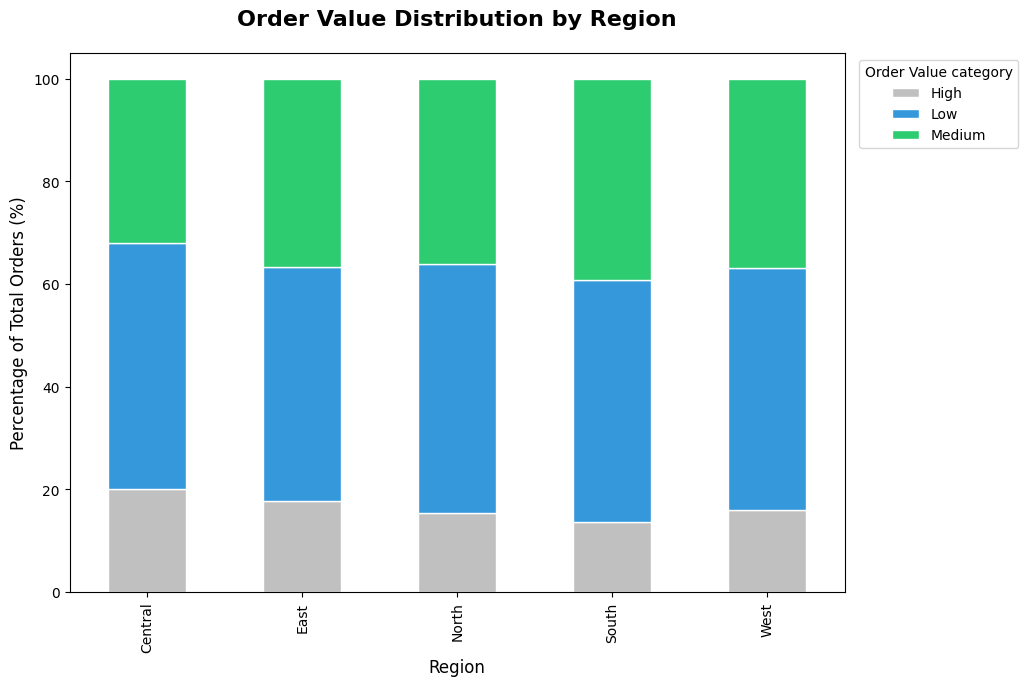

In [8]:
new_df=pd.crosstab(
    index=df.region,
    columns=df.order_value_category,
    normalize='index'
)*100

new_df.plot(
    kind='bar',
    stacked=True,
    figsize=(10,7),
    width=0.5,
    color=['silver', '#3498db', '#2ecc71'], # Silver, Blue, Green
    edgecolor='white'

)                                        

plt.legend(
    title="Order Value category",
    bbox_to_anchor=(1.01,1)
)
plt.title('Order Value Distribution by Region', fontsize=16, pad=20, fontweight='bold')
plt.ylabel('Percentage of Total Orders (%)', fontsize=12)
plt.xlabel('Region', fontsize=12)

plt.show()